In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import json
import re
import time
import seaborn as sns

In [3]:
matplotlib.rcParams['font.sans-serif'] = ['KaiTi']

In [6]:
path = 'data/openCT_data.xlsx'

In [7]:
df_all = pd.read_excel(path)

In [8]:
df_all

,时间戳,测试名称,准考证号,任务ID,任务名称,该时间戳下记录的作答结果,测试来源
0,2020-09-18T08:10:30+08:00,bnuadmin/小学试卷二,1241,1,房屋面积,"{""canvas"":{""swap"":[0,0,0,0,0,0]}}",bnuadmin
1,2020-09-18T08:10:48+08:00,bnuadmin/小学试卷二,1241,1,房屋面积,"{""canvas"":{""swap"":[1,0,0,0,0,0]}}",bnuadmin
2,2020-09-18T08:10:49+08:00,bnuadmin/小学试卷二,1241,1,房屋面积,"{""canvas"":{""swap"":[0,0,0,0,0,0]}}",bnuadmin
3,2020-09-18T08:10:49+08:00,bnuadmin/小学试卷二,1241,1,房屋面积,"{""canvas"":{""swap"":[1,0,0,0,0,0]}}",bnuadmin
4,2020-09-18T08:10:51+08:00,bnuadmin/小学试卷二,1241,1,房屋面积,"{""canvas"":{""swap"":[1,0,1,0,0,0]}}",bnuadmin
...,...,...,...,...,...,...,...
631,2020-09-22T14:19:53+08:00,bnuadmin/小学试卷二,1051,1,房屋面积,"{""canvas"":{""swap"":[1,1,0,0,1,0]}}",bnuadmin
632,2020-09-22T14:19:54+08:00,bnuadmin/小学试卷二,1051,1,房屋面积,"{""canvas"":{""swap"":[1,1,0,1,1,0]}}",bnuadmin
633,2020-09-22T14:19:56+08:00,bnuadmin/小学试卷二,1051,1,房屋面积,"{""canvas"":{""swap"":[1,1,0,1,1,1]}}",bnuadmin
634,2020-09-22T14:20:07+08:00,bnuadmin/小学试卷二,1051,1,房屋面积,"{""canvas"":{""swap"":[1,1,0,1,0,1]}}",bnuadmin


In [9]:
df_use = df_all.loc[:, ['时间戳', '准考证号', '该时间戳下记录的作答结果']]

In [10]:
df_use

,时间戳,准考证号,该时间戳下记录的作答结果
0,2020-09-18T08:10:30+08:00,1241,"{""canvas"":{""swap"":[0,0,0,0,0,0]}}"
1,2020-09-18T08:10:48+08:00,1241,"{""canvas"":{""swap"":[1,0,0,0,0,0]}}"
2,2020-09-18T08:10:49+08:00,1241,"{""canvas"":{""swap"":[0,0,0,0,0,0]}}"
3,2020-09-18T08:10:49+08:00,1241,"{""canvas"":{""swap"":[1,0,0,0,0,0]}}"
4,2020-09-18T08:10:51+08:00,1241,"{""canvas"":{""swap"":[1,0,1,0,0,0]}}"
...,...,...,...
631,2020-09-22T14:19:53+08:00,1051,"{""canvas"":{""swap"":[1,1,0,0,1,0]}}"
632,2020-09-22T14:19:54+08:00,1051,"{""canvas"":{""swap"":[1,1,0,1,1,0]}}"
633,2020-09-22T14:19:56+08:00,1051,"{""canvas"":{""swap"":[1,1,0,1,1,1]}}"
634,2020-09-22T14:20:07+08:00,1051,"{""canvas"":{""swap"":[1,1,0,1,0,1]}}"


In [11]:
df_use.rename({'时间戳':'timestamp', '准考证号':'userID', '该时间戳下记录的作答结果':'result'}, axis='columns', inplace=True)

In [12]:
# 清洗result中的数据
def deal_result(result):
    a_dict =json.loads(result)
    return a_dict.get('canvas').get('swap')

In [13]:
df_use['result'] = df_use['result'].apply(deal_result)

In [14]:
df_use

,timestamp,userID,result
0,2020-09-18T08:10:30+08:00,1241,"[0, 0, 0, 0, 0, 0]"
1,2020-09-18T08:10:48+08:00,1241,"[1, 0, 0, 0, 0, 0]"
2,2020-09-18T08:10:49+08:00,1241,"[0, 0, 0, 0, 0, 0]"
3,2020-09-18T08:10:49+08:00,1241,"[1, 0, 0, 0, 0, 0]"
4,2020-09-18T08:10:51+08:00,1241,"[1, 0, 1, 0, 0, 0]"
...,...,...,...
631,2020-09-22T14:19:53+08:00,1051,"[1, 1, 0, 0, 1, 0]"
632,2020-09-22T14:19:54+08:00,1051,"[1, 1, 0, 1, 1, 0]"
633,2020-09-22T14:19:56+08:00,1051,"[1, 1, 0, 1, 1, 1]"
634,2020-09-22T14:20:07+08:00,1051,"[1, 1, 0, 1, 0, 1]"


In [15]:
def deal_time(time_str):
    time_str = re.match('.*\+', time_str)
    time_str = time_str[0].replace('+', '')
    #转换成时间数组
    timeArray = time.strptime(time_str, "%Y-%m-%dT%H:%M:%S")
    #转换成时间戳
    timestamp = time.mktime(timeArray)
    return timestamp

In [16]:
test = deal_time(df_use.timestamp[0])
type(test)

float

In [17]:
df_use['timestamp'] = df_use['timestamp'].apply(deal_time)

In [18]:
df_use

,timestamp,userID,result
0,1.600388e+09,1241,"[0, 0, 0, 0, 0, 0]"
1,1.600388e+09,1241,"[1, 0, 0, 0, 0, 0]"
2,1.600388e+09,1241,"[0, 0, 0, 0, 0, 0]"
3,1.600388e+09,1241,"[1, 0, 0, 0, 0, 0]"
4,1.600388e+09,1241,"[1, 0, 1, 0, 0, 0]"
...,...,...,...
631,1.600756e+09,1051,"[1, 1, 0, 0, 1, 0]"
632,1.600756e+09,1051,"[1, 1, 0, 1, 1, 0]"
633,1.600756e+09,1051,"[1, 1, 0, 1, 1, 1]"
634,1.600756e+09,1051,"[1, 1, 0, 1, 0, 1]"


In [19]:
df_use.timestamp = df_use.timestamp.astype(int)

In [20]:
df_use.head(20)

,timestamp,userID,result
0,1600387830,1241,"[0, 0, 0, 0, 0, 0]"
1,1600387848,1241,"[1, 0, 0, 0, 0, 0]"
2,1600387849,1241,"[0, 0, 0, 0, 0, 0]"
3,1600387849,1241,"[1, 0, 0, 0, 0, 0]"
4,1600387851,1241,"[1, 0, 1, 0, 0, 0]"
5,1600387851,1241,"[1, 0, 0, 0, 0, 0]"
6,1600387853,1241,"[1, 0, 1, 0, 0, 0]"
7,1600387853,1241,"[1, 0, 0, 0, 0, 0]"
8,1600387854,1241,"[1, 0, 1, 0, 0, 0]"
9,1600387854,1266,"[0, 0, 0, 0, 0, 0]"


In [21]:
# 分组排序
df_use = df_use.sort_values(by=['userID', 'timestamp'])

In [22]:
df_use

,timestamp,userID,result
347,1600669439,1031,"[0, 0, 0, 0, 0, 0]"
358,1600669453,1031,"[1, 0, 0, 0, 0, 0]"
359,1600669455,1031,"[1, 1, 0, 0, 0, 0]"
363,1600669457,1031,"[1, 1, 1, 0, 0, 0]"
365,1600669459,1031,"[1, 1, 1, 0, 1, 0]"
...,...,...,...
181,1600388136,1269,"[1, 1, 1, 0, 1, 0]"
183,1600388137,1269,"[0, 1, 1, 0, 1, 0]"
184,1600388140,1269,"[1, 1, 1, 0, 1, 0]"
263,1600388439,1270,"[0, 0, 0, 0, 0, 0]"


In [193]:
df_use.loc[df_use['userID']==1042]

,timestamp,userID,result
345,1600669437,1042,"[0, 0, 0, 0, 0, 0]"
369,1600669463,1042,"[0, 0, 0, 0, 0, 0]"
414,1600669512,1042,"[1, 0, 0, 0, 0, 0]"
415,1600669513,1042,"[0, 0, 0, 0, 0, 0]"
417,1600669515,1042,"[1, 0, 0, 0, 0, 0]"
423,1600669523,1042,"[1, 0, 1, 0, 0, 0]"
426,1600669525,1042,"[1, 1, 1, 0, 0, 0]"
430,1600669528,1042,"[1, 1, 1, 1, 0, 0]"
431,1600669529,1042,"[1, 1, 1, 1, 1, 0]"
433,1600669531,1042,"[1, 1, 1, 1, 1, 1]"


In [23]:
df_grouped = df_use.groupby('userID')

In [24]:
def deal_list(result_list):
    all_sum = 0
    # 将列表中元素与其索引相乘在相加
    for index, item in enumerate(result_list):
        all_sum += (index+1) * item
    return all_sum

In [25]:
user_dict = {}

In [26]:
for group in df_grouped:
    temp_df = df_grouped.get_group(group[0])
    list_result = []
    for result in temp_df.result:
        # 对当前行为数组加权求和
        temp_sum = deal_list(result)
        list_result.append(temp_sum)
    user_dict[group[0]] = list_result

In [27]:
user_dict.get(1031)

[0, 1, 3, 6, 11, 15, 21]

In [28]:
df_user_result = pd.DataFrame(pd.Series(user_dict), columns=['result'])
df_user_result = df_user_result.reset_index().rename(columns={'index':'userID'})

In [29]:
pd.set_option('max_colwidth',80)

In [30]:
df_user_result

,userID,result
0,1031,"[0, 1, 3, 6, 11, 15, 21]"
1,1032,"[0, 2, 0, 6, 0, 3, 8, 10, 16, 20, 21, 20, 16, 10, 11]"
2,1033,"[0, 1, 4, 8, 13]"
3,1034,"[0, 2]"
4,1035,"[0, 1, 0, 3, 4, 6, 10, 16]"
5,1036,"[0, 6, 0, 6, 7, 10, 15, 10, 12, 17, 21, 15, 14, 11, 17, 12, 8, 6, 0, 3, 7, 8..."
6,1037,"[0, 3, 9, 10, 12, 17, 15]"
7,1038,"[0, 3, 8, 9, 13]"
8,1039,"[0, 1, 4, 6, 12]"
9,1040,"[0, 1, 0, 0, 1, 3, 6, 11, 17, 12, 16]"


In [31]:
right_list = [[1,0,1,0,1,1],
              [1,0,1,1,1,0],
              [0,0,1,1,1,1],
              [1,1,1,0,0,1],
              [1,1,1,1,0,0],
              [0,1,1,1,0,1],
              [1,1,0,0,1,1],
              [1,1,0,1,1,0],
              [0,1,0,1,1,1]]

In [32]:
right_list_1 = []
for item in right_list:
    temp_sum = deal_list(item)
    right_list_1.append(temp_sum)

In [33]:
right_list_1

[15, 13, 18, 12, 10, 15, 14, 12, 17]

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

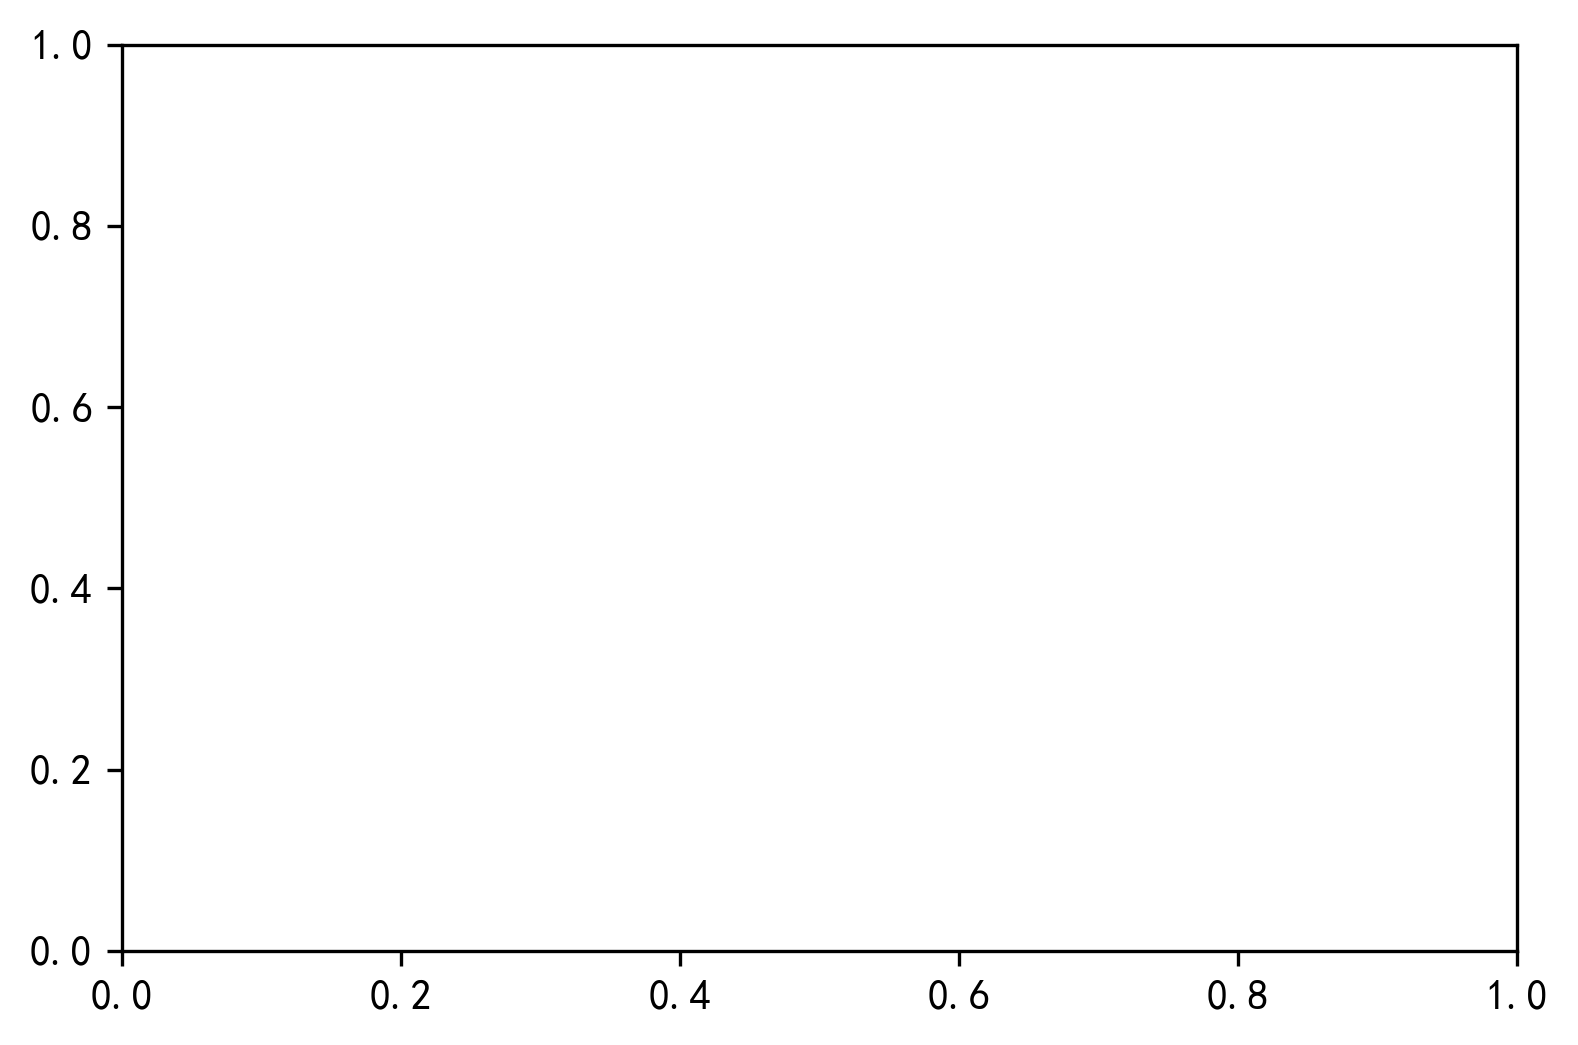

In [47]:
# 分辨率参数-dpi，画布大小参数-figsize
plt.figure(dpi=300)
# 改变文字大小参数-fontsize
plt.xticks(fontsize=10)

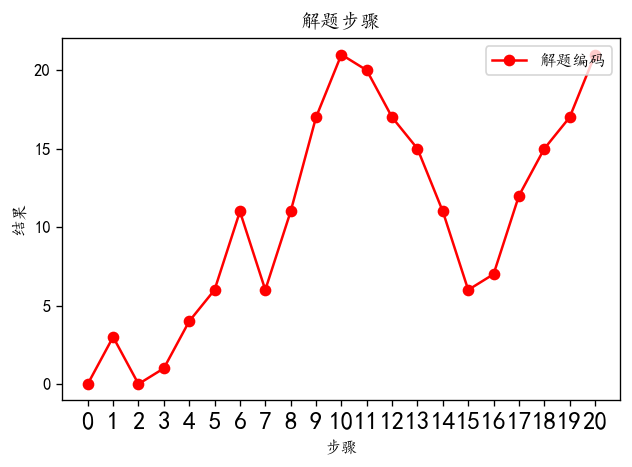

In [54]:
y = [0, 3, 0, 1, 4, 6, 11, 6, 11, 17, 21, 20, 17, 15, 11, 6, 7, 12, 15, 17, 21]
x = range(0, len(y))

plt.figure(dpi=120)
plt.plot(x, y, 'ro-', label='解题编码')
plt.legend(loc="upper right")
plt.title('解题步骤')
plt.xticks(ticks=x, fontsize=15)
plt.xlabel('步骤')
plt.ylabel('结果')
plt.show()